In [ ]:
#Install kaggle. Make sure you have json file from the dataset you want to analyze
!pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mithushan123","key":"0d09fdc4206849225aae6946d49cccb2"}'}

In [ ]:
# Basically unzips dataset
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d grassknoted/asl-alphabet
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
# Here we import everything we need for the project

%matplotlib inline
from google.colab import files
import os
from sklearn.model_selection import train_test_split

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

print(tf.__version__)

2.15.0


In [ ]:
import os
from collections import defaultdict

# Set up a dictionary to count images per letter
image_count_per_letter = defaultdict(int)
# Define the maximum number of images per letter
max_images_per_letter = 100

imagepaths = []
# Set the start directory
start_directory = "./asl_alphabet_train"

# List to store the names of subdirectories
subdirectories = []

# Subdirectories to skip
skip_dirs = {"del", "nothing", "space"}

# Go through all the files and subdirectories inside 'asl_alphabet_train'
for root, dirs, files in os.walk(start_directory, topdown=False):
    for dir in dirs:
        if dir in skip_dirs:
            continue  # Skip the specified subdirectories
        subdirectory = os.path.join(root, dir)
        subdirectories.append(subdirectory)
    for name in files:
        if name.lower().endswith(".jpg"):  # Check the extension to be 'jpg', case-insensitive
            # Extract the letter from the file path
            letter = os.path.basename(root)
            if letter in skip_dirs:
                continue  # Skip files in the specified subdirectories
            # Only proceed if we haven't already collected max_images_per_letter for this letter
            if image_count_per_letter[letter] < max_images_per_letter:
                path = os.path.join(root, name)
                imagepaths.append(path)
                image_count_per_letter[letter] += 1
                # If we've reached the limit for this letter, no need to continue checking
                if image_count_per_letter[letter] == max_images_per_letter:
                    continue

print("Number of image paths:", len(imagepaths))
print(f"Collected image paths, with up to {max_images_per_letter} images per letter.")

# Print the subdirectories
print("Subdirectories found:")
for subdir in subdirectories:
    print(subdir)


Number of image paths: 2600
Collected image paths, with up to 100 images per letter.
Subdirectories found:
./asl_alphabet_train/asl_alphabet_train/S
./asl_alphabet_train/asl_alphabet_train/B
./asl_alphabet_train/asl_alphabet_train/N
./asl_alphabet_train/asl_alphabet_train/G
./asl_alphabet_train/asl_alphabet_train/V
./asl_alphabet_train/asl_alphabet_train/D
./asl_alphabet_train/asl_alphabet_train/Q
./asl_alphabet_train/asl_alphabet_train/P
./asl_alphabet_train/asl_alphabet_train/E
./asl_alphabet_train/asl_alphabet_train/I
./asl_alphabet_train/asl_alphabet_train/A
./asl_alphabet_train/asl_alphabet_train/K
./asl_alphabet_train/asl_alphabet_train/T
./asl_alphabet_train/asl_alphabet_train/W
./asl_alphabet_train/asl_alphabet_train/Z
./asl_alphabet_train/asl_alphabet_train/R
./asl_alphabet_train/asl_alphabet_train/C
./asl_alphabet_train/asl_alphabet_train/H
./asl_alphabet_train/asl_alphabet_train/O
./asl_alphabet_train/asl_alphabet_train/L
./asl_alphabet_train/asl_alphabet_train/Y
./asl_alpha

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


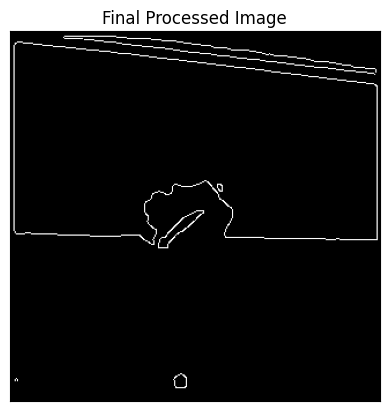

In [ ]:

#This section will output one image and show the final processed picture
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_and_plot_final_image(path):
    # Load the image
    image = cv2.imread(path)
    if image is None:
        raise ValueError("Image not found or path is incorrect")

    # Resize the image
    resized_image = cv2.resize(image, (320, 320))

    # Convert to grayscale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # Apply Otsu's thresholding
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Canny edge detection
    final_image = cv2.Canny(thresholded, 50, 150)

    # Normalize the final image
    normalized_image = final_image / 255.0

    # Display the final image
    plt.imshow(normalized_image, cmap='gray')
    plt.title("Final Processed Image")
    plt.xticks([]), plt.yticks([])  # Hide tick marks
    plt.show()


# Call the function with the path to your image
process_and_plot_final_image(imagepaths[2])


In [ ]:
print(imagepaths[2]) #debugging purpose

./asl_alphabet_train/asl_alphabet_train/S/S733.jpg


In [ ]:
#Apply computer vision algos to all pictures in dataset
import cv2
import numpy as np
import os

X = []  # Image data
y = []  # Labels
skipped_images = 0

# Define the desired image size
desired_size = (320, 320)

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
    # Load the image
    image = cv2.imread(path)
    if image is None:
        raise ValueError("Image not found or path is incorrect")

    # Resize the image to the desired size
    resized_image = cv2.resize(image, desired_size)

    # Convert to grayscale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # Apply Otsu's thresholding
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Canny edge detection
    final_image = cv2.Canny(thresholded, 50, 150)

    # Add the processed image to the dataset
    X.append(final_image)

    # Process the label in the image path
    filename = os.path.basename(path)
    label_part = filename.split(".")[0]

    label_mapping = {
        'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4,
        'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9,
        'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14,
        'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19,
        'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25
    }

    if len(label_part) > 1 and label_part[1:].isdigit():
        label_char = label_part[0]
        label = label_mapping.get(label_char, -1)
    else:
        label = label_mapping.get(label_part, -1)

    y.append(label)

# Convert X and y into np.array to speed up future processing
X = np.array(X, dtype="uint8")
X = X / 255.0  # Normalize pixel values to be between 0 and 1
X = X.reshape(len(imagepaths) - skipped_images, desired_size[0], desired_size[1], 1)  # Adjust for 1 channel

y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))


Images loaded:  2600
Labels loaded:  2600


In [ ]:
ts = 0.3  # Define the percentage of images for testing

from sklearn.model_selection import train_test_split

# Specify the 'stratify' parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42, stratify=y)


In [ ]:
# Import of keras model and hidden layers for our convolutional network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [ ]:
#Machine Learning Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import LearningRateScheduler

# Define a learning rate schedule
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 30:
        lr *= 0.5
    if epoch > 60:
        lr *= 0.5
    return lr

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Create and compile the model with corrected input shape
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(320, 320, 1)),  # Adjusted input shape
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')  # Adjust the number of units to match the number of classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Filter out samples with '-1' labels
valid_train_samples = y_train != -1
valid_test_samples = y_test != -1

X_train_filtered = X_train[valid_train_samples]
y_train_filtered = y_train[valid_train_samples]

X_test_filtered = X_test[valid_test_samples]
y_test_filtered = y_test[valid_test_samples]

# Train the model with the filtered datasets and the learning rate scheduler
model.fit(X_train_filtered, y_train_filtered, epochs=10, batch_size=64, verbose=2,
          validation_data=(X_test_filtered, y_test_filtered), callbacks=[lr_scheduler])


Epoch 1/10
29/29 - 111s - loss: 2.7540 - accuracy: 0.2181 - val_loss: 2.1060 - val_accuracy: 0.3641 - lr: 0.0010 - 111s/epoch - 4s/step
Epoch 2/10
29/29 - 108s - loss: 0.9327 - accuracy: 0.7049 - val_loss: 1.7515 - val_accuracy: 0.5167 - lr: 0.0010 - 108s/epoch - 4s/step
Epoch 3/10
29/29 - 108s - loss: 0.1795 - accuracy: 0.9495 - val_loss: 2.5569 - val_accuracy: 0.5321 - lr: 0.0010 - 108s/epoch - 4s/step
Epoch 4/10
29/29 - 107s - loss: 0.0578 - accuracy: 0.9813 - val_loss: 2.7616 - val_accuracy: 0.5192 - lr: 0.0010 - 107s/epoch - 4s/step
Epoch 5/10
29/29 - 106s - loss: 0.0215 - accuracy: 0.9945 - val_loss: 2.8755 - val_accuracy: 0.5218 - lr: 0.0010 - 106s/epoch - 4s/step
Epoch 6/10
29/29 - 107s - loss: 0.0098 - accuracy: 0.9978 - val_loss: 2.9534 - val_accuracy: 0.5346 - lr: 0.0010 - 107s/epoch - 4s/step
Epoch 7/10
29/29 - 106s - loss: 0.0245 - accuracy: 0.9940 - val_loss: 2.5456 - val_accuracy: 0.5372 - lr: 0.0010 - 106s/epoch - 4s/step
Epoch 8/10
29/29 - 106s - loss: 0.0313 - accurac

In [18]:

# Save entire model to a HDF5 file
model.save('projec_ASLrecognition.keras')

In [19]:
#Evaluation of accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

25/25 [==============================] - 15s 580ms/step - loss: 3.2598 - accuracy: 0.5218
Test accuracy: 52.18%


In [20]:
predictions = model.predict(X_test) # Make predictions towards the test set


25/25 [==============================] - 11s 436ms/step


In [21]:
np.argmax(predictions[0]), y_test[0] # If same, got it right


(8, 8)

In [22]:
# Function to plot images and labels for validation purposes
def validate_26_images(predictions_array, true_label_array, img_array):
    # Array for pretty printing and then figure size
    class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    plt.figure(figsize=(15, 15))

    for i in range(1, 27):
        # Just assigning variables
        prediction = predictions_array[i]
        true_label = true_label_array[i]
        img = img_array[i]

        # Plot in a good way
        plt.subplot(7, 4, i)  # You may need to adjust the layout based on your preference
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img, cmap=plt.cm.binary)

        predicted_label = np.argmax(prediction)  # Get index of the predicted label from prediction

        # Change color of title based on good prediction or not
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'

        plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                      100*np.max(prediction),
                                      class_names[true_label]),
                                      color=color)
    plt.show()


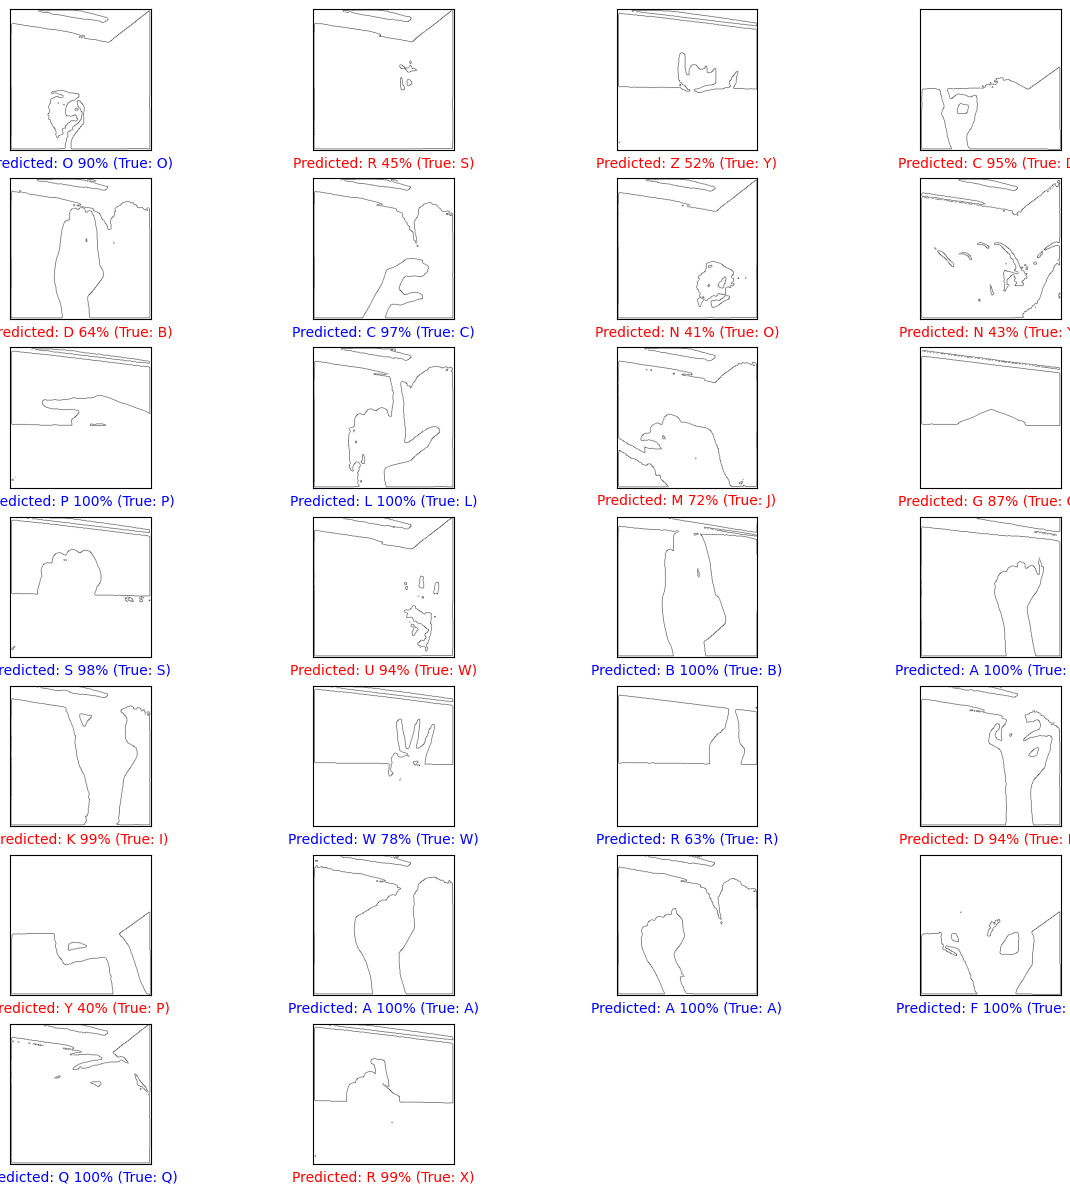

In [23]:
validate_26_images(predictions, y_test, X_test)


In [24]:
y_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number


In [25]:
! pip install tabulate #install tables


In [26]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from tabulate import tabulate

# Assuming y_test contains the true labels and y_pred contains the predicted labels
confusion = confusion_matrix(y_test, y_pred)

# Define the alphabet labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Create a DataFrame for the confusion matrix with labeled columns and indices
confusion_df = pd.DataFrame(confusion, columns=[f"Predicted {class_name}" for class_name in class_names],
                            index=[f"Actual {class_name}" for class_name in class_names])

# Display the confusion matrix as a formatted table
print(tabulate(confusion_df, headers='keys', tablefmt='fancy_grid'))


╒══════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│          │   Predicted A │   Predicted B │   Predicted C │   Predicted D │   Predicted E │   Predicted F │   Predicted G │   Predicted H │   Predicted I │   Predicted J │   Predicted K │   Predicted L │   Predicted M │   Predicted N │   Predicted O │   Predicted P │   Predicted Q │   Predicted R │   Predicted S │   Predicted T │   Predicted U │   Predicted V │   Predicted W │   Predicted X │   Predicted Y │   Predicted Z │
╞══════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪══